# Assingment 1, Clustering Using KMeans

## Data 

Text document classification dataset which contains 2225 text data and five categories of documents. 
Five categories are: 
* politics: 0 
* sport: 1 
* tech: 2 
* entertainment: 3
* business: 4

In [313]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import normalized_mutual_info_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# warnings ignore
warnings.filterwarnings('ignore') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whois\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\whois\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\whois\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\whois\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [314]:
data = pd.read_csv("df_file.csv")

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
5,Donor attacks Blair-Brown 'feud'\n \n The repo...,0
6,Research fears over Kelly's views\n \n Scienti...,0
7,Chancellor rallies Labour voters\n \n Gordon B...,0
8,Fox attacks Blair's Tory 'lies'\n \n Tony Blai...,0
9,Tories unveil quango blitz plans\n \n Plans to...,0


Class distribution is relatively close.

In [315]:
display(data["Label"].value_counts())

display(round(data["Label"].value_counts() / len(data) * 100, 1))

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

Label
1    23.0
4    22.9
0    18.7
2    18.0
3    17.3
Name: count, dtype: float64

## Data cleaning

We also lemmatize our data.

In [316]:
# cleaning data from duplicates
display(data.duplicated().sum())

data = data.drop_duplicates()

98

In [317]:
# list with stop-words in english
stop_words = stopwords.words('english')

# function that clean the text
def clean_text(text):
    # removing extra characters 
    text = re.sub(r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]', '', text)
    # replacing references with 'URL'
    text = re.sub(r'(http\S+)|(www\S+)|([\w\d]+www\S+)|([\w\d]+http\S+)', r'URL', text)
    # replacing numbers with 'NUM'
    text = re.sub(r'(\d+\s\d+)|(\d+)',' NUM ', text)
    # removing extra spaces 
    text = re.sub(r'\s+', ' ', text)
    # convert text to lower case 
    text = text.lower()
    # cleaning the text from the stop-words
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    
    return ' '.join(text)

In [318]:
# creating new feature with cleaned text
data['lemm_Text'] = data['Text'].apply(clean_text)

# reseting index, droping old one
data = data.reset_index(drop=True)

# changing columns positions
data = data[["Text", "lemm_Text", "Label"]]

display(data)

,Text,lemm_Text,Label
0,Budget to set scene for election\n \n Gordon B...,budget set scene election gordon brown seek pu...,0
1,Army chiefs in regiments decision\n \n Militar...,army chiefs regiments decision military chiefs...,0
2,Howard denies split over ID cards\n \n Michael...,howard denies split id cards michael howard de...,0
3,Observers to monitor UK election\n \n Minister...,observers monitor uk election ministers invite...,0
4,Kilroy names election seat target\n \n Ex-chat...,kilroy names election seat target exchat show ...,0
...,...,...,...
2122,India opens skies to competition\n \n India wi...,india opens skies competition india allow dome...,4
2123,Yukos bankruptcy 'not US matter'\n \n Russian ...,yukos bankruptcy 'not us matter ' russian auth...,4
2124,Survey confirms property slowdown\n \n Governm...,survey confirms property slowdown government f...,4
2125,High fuel prices hit BA's profits\n \n British...,high fuel prices hit ba 's profits british air...,4


## Model evaluation 

We will be utilizing the KMeans clustering model for our analysis.

Also, we will apply **TF-IDF vectorizing** as a document representation.

In [319]:
# TF-IDF vectorizer with stop words removal
vectorizer = TfidfVectorizer(stop_words=stop_words)

# applying vectorizer
features = vectorizer.fit_transform(data['lemm_Text'])

In [320]:
# KMeans clustering model
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)

# model implementing
kmeans_model.fit(features)

KMeans(n_clusters=5, random_state=42)

In [321]:
# assinged clusters labels
cluster_labels = kmeans_model.labels_

# adding cluster labels to the data
data['Cluster'] = cluster_labels

display(data)

,Text,lemm_Text,Label,Cluster
0,Budget to set scene for election\n \n Gordon B...,budget set scene election gordon brown seek pu...,0,2
1,Army chiefs in regiments decision\n \n Militar...,army chiefs regiments decision military chiefs...,0,2
2,Howard denies split over ID cards\n \n Michael...,howard denies split id cards michael howard de...,0,2
3,Observers to monitor UK election\n \n Minister...,observers monitor uk election ministers invite...,0,2
4,Kilroy names election seat target\n \n Ex-chat...,kilroy names election seat target exchat show ...,0,2
...,...,...,...,...
2122,India opens skies to competition\n \n India wi...,india opens skies competition india allow dome...,4,1
2123,Yukos bankruptcy 'not US matter'\n \n Russian ...,yukos bankruptcy 'not us matter ' russian auth...,4,1
2124,Survey confirms property slowdown\n \n Governm...,survey confirms property slowdown government f...,4,1
2125,High fuel prices hit BA's profits\n \n British...,high fuel prices hit ba 's profits british air...,4,1


## Visualization

**Principal Component Analysis (PCA)** is a powerful dimensionality reduction technique, making it an excellent choice for this task. 
It allows us to simplify complex data while preserving important patterns, providing clear visual insights into the structure of our clusters.


### Scatterplot for clusters assigned by KMeans 

We also mark KMeans centroids.

In [322]:
# dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features.toarray())

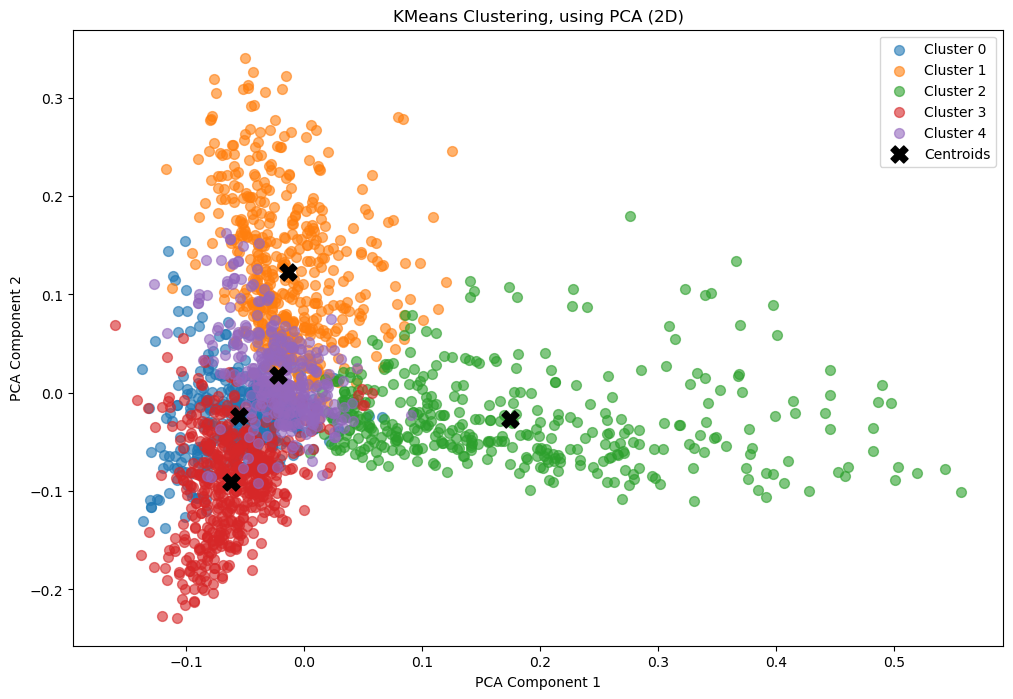

In [323]:
# making a figure
plt.figure(figsize=(12, 8))

# scatter plot, coloring by cluster labels
for cluster in np.unique(cluster_labels):
    cluster_data = features_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', s=50, alpha=0.6)

# centroids highlighting 
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)

# marking centroids as red points
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=150, marker='X', label='Centroids')

plt.title('KMeans Clustering, using PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### Scatterplot for Original clusters

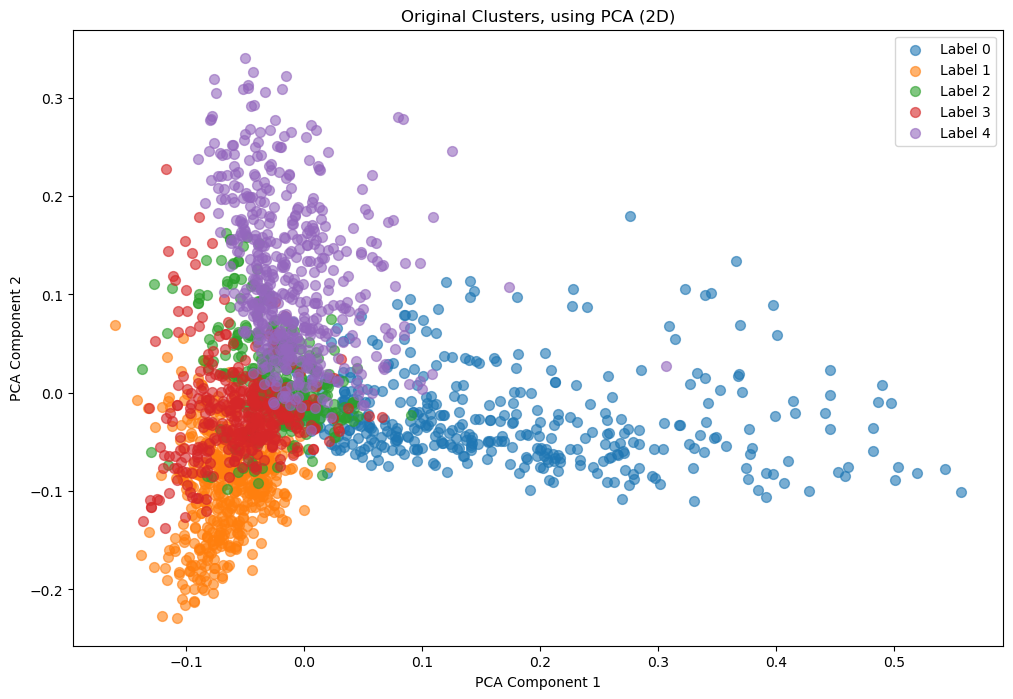

In [324]:
# making a figure
plt.figure(figsize=(12, 8))

# scatter plot, coloring by actual labels
for label in np.unique(data['Label']):
    cluster_data = features_pca[data['Label'] == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Label {label}', s=50, alpha=0.6)

plt.title('Original Clusters, using PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### Cluster-to-Label Mapping Observations

After analyzing the scatterplots, we observed a correspondence between the actual labels and the assigned clusters as follows:

| **Actual Label** | **Assigned Cluster** | **Text Category** |
|------------------|----------------------|-------------------|
| Label 0          | Cluster 2            | politics          |
| Label 1          | Cluster 3            | sport             |
| Label 2          | Cluster 4            | tech              |
| Label 3          | Cluster 0            | entertainment     |
| Label 4          | Cluster 1            | business          |


This mapping helps to understand the relationship between the actual labels, clustering assignments and actual text category.

## Model perfomance evaluation

Given the characteristics of our case:
* Access to True labels
* Arbitrary Cluster labels
* Multi-class data
* Slight class imbalance 

**Normalized Mutual Information (NMI)** score is a suitable choice for the evaluation metric, as it effectively measures the similarity between the true labels and the arbitrary clusters.

In [325]:
# nmi score evaluation
nmi_score = normalized_mutual_info_score(data['Label'], cluster_labels)

display(f'Normalized Mutual Information (NMI) Score: {round(nmi_score, 2)}')

'Normalized Mutual Information (NMI) Score: 0.83'

## Observing clusters

Each cluster assigned right in the random sample, except one with index **2041**

In [326]:
# making a random sample from the data grouped by two assigned clusters 
sampled_data = (data.drop('lemm_Text', axis=1)
                    .groupby('Cluster')
                    .apply(lambda x: x.sample(n=2, random_state=42)))

display(sampled_data)

Text  Label  \
Cluster                                                                  
0       1417  Bollywood DVD fraudster is jailed\n \n A major...      3   
        1275  X Factor show gets second series\n \n TV talen...      3   
1       2116  US Ahold suppliers face charges\n \n US prosec...      4   
        1667  China suspends 26 power projects\n \n China ha...      4   
2       298   Straw to attend Auschwitz service\n \n Foreign...      0   
        50    Police probe BNP mosque leaflet\n \n Police ar...      0   
3       555   Mirza shocks Kuznetsova\n \n Sania Mirza conti...      1   
        793   UK Athletics agrees new kit deal\n \n UK Athle...      1   
4       1021  Firefox browser takes on Microsoft\n \n Micros...      2   
        2041  Electronics firms eye plasma deal\n \n Consume...      4   

              Cluster  
Cluster                
0       1417        0  
        1275        0  
1       2116        1  
        1667        1  
2       298         2  
        50          2  
3       555         3  
        793         3  
4       1021        4  
        2041        4

It appears that the model incorrectly assigned this text to **Cluster 4 (tech)**, while its true label is **4 (business)**. 

Although the text involves technology, the primary focus is on business-related matters such as market strategies, partnerships, and product development, indicating that it should belong to the **business** category.

In [327]:
display(data.loc[2041, "Text"])

"Electronics firms eye plasma deal\n \n Consumer electronics giants Hitachi and Matshushita Electric are joining forces to share and develop technology for flat screen televisions.\n \n The tie-up comes as the world's top producers are having to contend with falling prices and intense competition. The two Japanese companies will collaborate in research & development, production, marketing and licensing. They said the agreement would enable the two companies to expand the plasma display TV market globally.\n \n Plasma display panels are used for large, thin TVs which are replacing old-style televisions. The display market for high-definition televisions is split between models using plasma display panels and others - manufactured by the likes of Sony and Samsung - using liquid-crystal displays (LCDs). The deal will enable Hitachi and Matsushita, which makes Panasonic brand products, to develop new technology and improve their competitiveness. Hitachi recently announced a deal to buy pla

# Assignment Summary

In this assignment, we applied **KMeans clustering** to group text data and used **Principal Component Analysis (PCA)** for dimensionality reduction and visualization.

## Key Steps:

1. **Preprocessing and Feature Extraction**:
   - Text data was cleaned through **lemmatization** and **stop-word removal**.
   - **TF-IDF Vectorization** transformed the text into numerical features for clustering.

2. **Clustering with KMeans**:
   - The KMeans model was fitted to the TF-IDF data, and clusters were visualized using **PCA for 2D plotting**, with distinct colors for each cluster and contrast centroids.

3. **Performance Evaluation**:
   - **Normalized Mutual Information (NMI)** was chosen as the evaluation metric, as it effectively measures the overlap between true labels and cluster assignments in unsupervised tasks.

4. **Cluster Observation**:
   - Random samples from each cluster were reviewed. While the clustering generally made sense, some documents were misclassified, especially when categories like **tech** and **business** overlapped.

## Conclusion:
The use of KMeans clustering with PCA visualization provided clear insights into the data structure. **NMI** proved to be a reliable metric for evaluating clustering performance against true labels. While the model performed well overall, some misclassifications highlighted the challenge of distinguishing between closely related categories, such as tech and business, indicating room for further model tuning or feature engineering.
